# Projeto 2 Ciência de Dados - Periculosidade por Unidade Federativa

    Grupo: Matheus Almeida, Nicholas Thuessen e Vinicius Miranda
    
   * Descrição do projeto: Não é surpresa para ninguém que o Brasil é um país bem perigoso quando se trata de homicídios. Com uma das taxas mais elevadas de crimes violentos do mundo, a nação enfrenta desafios significativos em segurança pública e justiça social. Essa realidade alarmante não apenas reflete as complexas dinâmicas socioeconômicas e políticas do país, mas também destaca a urgente necessidade de intervenções eficazes.
   
   
      Neste projeto, vamos além da mera constatação do problema, mergulhando profundamente nas estatísticas de violência para revelar as tendências, disparidades regionais e fatores precipitantes que contribuem para a alta incidência de homicídios em cada unidade federativa do Brasil. Utilizando métodos avançados de análise de dados e modelagem estatística, buscaremos padrões e correlações que possam não apenas mapear o cenário atual, mas também fornecer previsões confiáveis para cenários futuros.
    
      O objetivo é duplo: entender as raízes e os contornos da violência homicida no contexto brasileiro e, com base nesse entendimento, propor intervenções baseadas em evidências que possam ser implementadas por formuladores de políticas e instituições de segurança pública. Espera-se que as descobertas deste estudo ofereçam insights valiosos para a criação de estratégias de prevenção ao crime mais efetivas e políticas sociais mais assertivas, impactando positivamente na redução dos índices de homicídios e no melhoramento da qualidade de vida dos brasileiros.

   * Objetivo do projeto: Qual vai ser a Unidade Federativa mais perigosa para se viver?
    
   * Etapas: 
   * 1) Limpeza da base de dados 
   * 2) Análise dos dados
   * 3) Conclusão
   

fonte: https://basedosdados.org/dataset/9a2368e4-2fa6-4b42-88b7-026aa048f5ab?table=82e257d0-3564-4122-ba4a-78a039ca89b7

fonte: http://www.atlasbrasil.org.br/ranking

In [74]:
#Importando base de dados necessárias para o projeto

%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import os

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

#KNN:

import subprocess

# Biblioteca para criar nosso modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

import seaborn as sns

## Etapa 1: Limpeza de Dados

Nessa etapa limpamos a base de dados importada para facilitar  análise exploratória e deixar mais claro o nosso intuito.

In [75]:
#Definindo uma varável para a base de dados
dados = pd.read_csv('dados_basedosdados.csv')
dados.head(10)

,ano,sigla_uf,id_municipio,grupo,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,2016,AL,2704302,Grupo 1,449,21,2.0,5.0,59.0,0.0,...,11.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,2.0
1,2016,CE,2304400,Grupo 1,965,27,15.0,8.0,39.0,1.0,...,3.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,5.0
2,2016,ES,3205309,Grupo 1,51,0,3.0,0.0,9.0,1.0,...,14.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2016,GO,5208707,Grupo 1,452,33,14.0,3.0,100.0,0.0,...,16.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0
4,2016,MA,2111300,Grupo 1,498,23,12.0,1.0,27.0,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
5,2016,MT,5103403,Grupo 1,196,18,4.0,3.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2.0
6,2016,PA,1501402,Grupo 1,878,41,20.0,10.0,39.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,7.0
7,2016,PB,2507507,Grupo 1,341,8,1.0,4.0,5.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,1.0
8,2016,PE,2611606,Grupo 1,624,5,11.0,6.0,15.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,5.0
9,2016,PI,2211001,Grupo 1,341,22,4.0,1.0,7.0,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


Substituindo todas as informações que não foram fornecidas pela base de dados classificadas como NAN, para zero.

In [76]:
# Substituir NAN por 0
dados = dados.fillna(0)
dados

,ano,sigla_uf,id_municipio,grupo,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,2016,AL,2704302,Grupo 1,449,21,2.0,5.0,59.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,2016,CE,2304400,Grupo 1,965,27,15.0,8.0,39.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0
2,2016,ES,3205309,Grupo 1,51,0,3.0,0.0,9.0,1.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,GO,5208707,Grupo 1,452,33,14.0,3.0,100.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2016,MA,2111300,Grupo 1,498,23,12.0,1.0,27.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2021,AC,1200401,Grupo 3,92,4,1.0,0.0,6.0,0.0,...,6.0,0.0,0.0,64.0,200.0,44.0,0.0,0.0,0.0,0.0
158,2021,AM,1302603,Grupo 3,1060,44,12.0,4.0,69.0,0.0,...,5.0,56.0,193.0,249.0,1454.0,191.0,0.0,0.0,0.0,0.0
159,2021,AP,1600303,Grupo 3,184,18,9.0,0.0,119.0,0.0,...,36.0,0.0,0.0,0.0,520.0,156.0,0.0,0.0,0.0,0.0
160,2021,RO,1100205,Grupo 3,161,5,6.0,0.0,6.0,0.0,...,3.0,111.0,286.0,397.0,416.0,109.0,0.0,0.0,0.0,0.0


Filtrando as colunas relevantes: o código da linha seguinte, elimina as colunas de grupo e id do município, por não possuirem utilidade em nossa pesquisa 

In [77]:
del dados['id_municipio']
del dados['grupo']

No código abaixo, definimos um valor mínimo para que possamos considerar a coluna relevante, no caso, todas as colunas cujo a maioria das variáveis seja inferior a 1 e nenhum varável quantitativa dessa coluna seja maior que 30 e possa ser considerada relevante para a pesquisa, serão eliminadas.

In [78]:
# Selecionar todas as colunas após as duas primeiras (ano e sigla_uf)
colunas_para_filtrar = dados.columns[2:] 

# Lista para armazenar as colunas relevantes
colunas_relevantes = ['ano', 'sigla_uf'] 

# Definir o limite para considerar a coluna relevante
limite_valores_relevantes = 0.1 * len(dados)  # Por exemplo, consideramos relevante se mais de 10% dos valores estão fora do intervalo

# Percorrer as colunas para verificar os valores
for coluna in colunas_para_filtrar:
    # Verificar se a maioria dos valores está abaixo de 1
    valores_dentro_do_range = dados[(dados[coluna] <= 1)][coluna]
    
    # Verificar se a maioria dos valores está fora do range de 0 a 30
    if len(valores_dentro_do_range) < limite_valores_relevantes:
        colunas_relevantes.append(coluna)

# Criar um novo DataFrame apenas com as colunas relevantes
dados = dados[colunas_relevantes]

A seguir, eliminamos as varáiveis quantidade_furto_veiculos e quantidade_roubo_veiculos, pois já existe uma variável que contabiliza ambos em uma só coluna.

In [79]:
del dados['quantidade_furto_veiculos']
del dados['quantidade_roubo_veiculos']
dados
# Abaixo se encontram as categorias que serão usadas no restante do projeto

,ano,sigla_uf,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_mortes_intervencao_policial,quantidade_mortes_violentas_intencionais,quantidade_estupro,quantidade_roubo_furto_veiculos
0,2016,AL,449,21,59.0,531,155.0,1538.0
1,2016,CE,965,27,39.0,1046,458.0,9235.0
2,2016,ES,51,0,9.0,63,25.0,565.0
3,2016,GO,452,33,100.0,599,161.0,11031.0
4,2016,MA,498,23,27.0,560,224.0,2165.0
...,...,...,...,...,...,...,...,...
157,2021,AC,92,4,6.0,97,213.0,1095.0
158,2021,AM,1060,44,69.0,1185,590.0,3945.0
159,2021,AP,184,18,119.0,330,316.0,480.0
160,2021,RO,161,5,6.0,178,264.0,2537.0


A variável a seguir será a soma de todos as varáveis, cujo seus valores representam homicídios, além disso as colunas consideradas na variável serão eliminadas.

In [80]:
dados['homicidios'] = dados['quantidade_homicidio_doloso']+dados['quantidade_latrocinio']+dados['quantidade_mortes_intervencao_policial']+dados['quantidade_mortes_violentas_intencionais']


C:\Users\mathe\AppData\Local\Temp/ipykernel_21232/18365683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['homicidios'] = dados['quantidade_homicidio_doloso']+dados['quantidade_latrocinio']+dados['quantidade_mortes_intervencao_policial']+dados['quantidade_mortes_violentas_intencionais']


Removemos as mesmas para facilitar a compreenção da nossa base de dados

In [81]:
del dados['quantidade_homicidio_doloso']
del dados['quantidade_latrocinio']
del dados['quantidade_mortes_intervencao_policial']
del dados['quantidade_mortes_violentas_intencionais']

### Resultado da limpeza da base de dados

In [82]:
dados

,ano,sigla_uf,quantidade_estupro,quantidade_roubo_furto_veiculos,homicidios
0,2016,AL,155.0,1538.0,1060.0
1,2016,CE,458.0,9235.0,2077.0
2,2016,ES,25.0,565.0,123.0
3,2016,GO,161.0,11031.0,1184.0
4,2016,MA,224.0,2165.0,1108.0
...,...,...,...,...,...
157,2021,AC,213.0,1095.0,199.0
158,2021,AM,590.0,3945.0,2358.0
159,2021,AP,316.0,480.0,651.0
160,2021,RO,264.0,2537.0,350.0


Agora com a posse de uma base de dados limpa, apenas com as informações úteis que utilizaremos na análise, podemos passar para a próxima etapa de análise de dados. 

## Etapa 2: Análise dos Dados Filtrados

Após filtrarmos os dados, chegamos a tabela acima, cujo os dados apesar de extremamente relevantes e numerosos, não possuem muita relação a primeira vista, em um contexto de análise, com isso, foi necessário a adição de uma nova tabela de dados, contendo o PIB por capita de cada um dos Estados, uma vez que, acreditamos ser um importante fator responsável por influir nos dados acima.

Adicionando dados sobre o PIB brasileiro.

In [83]:
PIB = pd.read_excel('PIB dos Municípios - base de dados 2010-2020.xls')

PIB


,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,1.611853e+04,6.249618e+04,9.324466e+04,2.411198e+05,2.095711e+04,2.620769e+05,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,2.871386e+05,4.949463e+05,3.438677e+05,1.199664e+06,1.650296e+05,1.364694e+06,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,3.252506e+03,1.267721e+04,2.517024e+04,6.540077e+04,4.210342e+03,6.961111e+04,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,1.820515e+05,4.654473e+05,2.984543e+05,1.041212e+06,1.452817e+05,1.186494e+06,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,1.973448e+04,8.072499e+04,6.301827e+04,1.924542e+05,2.956703e+04,2.220212e+05,13037.06,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61250,2020,5,Centro-oeste,52,GO,Goiás,5222005,Vianópolis,NaN,5205,...,3.136187e+04,1.986249e+05,6.865409e+04,5.366345e+05,5.067848e+04,5.873130e+05,42019.96,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Comércio e reparação de veículos automotores e...
61251,2020,5,Centro-oeste,52,GO,Goiás,5222054,Vicentinópolis,NaN,5205,...,7.590880e+04,1.024780e+05,4.797661e+04,3.851815e+05,3.337534e+04,4.185569e+05,47171.97,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Indústrias de transformação
61252,2020,5,Centro-oeste,52,GO,Goiás,5222203,Vila Boa,Região Integrada de Desenvolvimento do Distrit...,5204,...,2.283675e+04,2.954692e+04,3.357719e+04,1.143184e+05,7.568798e+03,1.218872e+05,19310.39,"Administração, defesa, educação e saúde públic...",Demais serviços,Indústrias de transformação
61253,2020,5,Centro-oeste,52,GO,Goiás,5222302,Vila Propício,Região Integrada de Desenvolvimento do Distrit...,5204,...,2.693973e+04,3.481211e+04,3.287036e+04,2.097357e+05,8.737748e+03,2.184735e+05,37142.72,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços


Tendo em vista que os dados acima são muito amplos, afim de reduzir nosssa amostra de PIB para incluir apenas dados relevantes para a pesquisa, criamos uma novo data frame, contendo apenas o PIB por Capita entre os anos de 2016 até 2020, alêm disso, como os dados acima incluem cada município de cada região iremos agrupalos de forma a possuir o PIB por Capita da região naquele ano como um todo.

In [84]:
dados_PIB = pd.DataFrame(PIB.loc[:, 'Ano'])
dados_PIB['sigla_uf'] = PIB.loc[:, 'Sigla da Unidade da Federação']
dados_PIB['PIB_por_Cap'] = PIB.loc[:, 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']
dados_PIB = dados_PIB.loc[dados_PIB.Ano >= 2016]
dados_PIB_filtrado = pd.DataFrame()

for i in range(2016, 2021):
    data = dados_PIB[dados_PIB['Ano'] == i].copy()
    media_PIB_por_capita = data.groupby('sigla_uf')['PIB_por_Cap'].mean().reset_index()
    media_PIB_por_capita['ano'] = i
    dados_PIB_filtrado = pd.concat([dados_PIB_filtrado, media_PIB_por_capita], ignore_index=True)


# Reorganizar as colunas para começar com 'ano'
dados_PIB_filtrado = dados_PIB_filtrado[['ano', 'sigla_uf', 'PIB_por_Cap']]

# Exibir o DataFrame resultante
dados_PIB_filtrado

,ano,sigla_uf,PIB_por_Cap
0,2016,AC,13696.683182
1,2016,AL,11188.969216
2,2016,AM,9664.777581
3,2016,AP,16830.723750
4,2016,BA,11139.893501
...,...,...,...
130,2020,RS,40208.401670
131,2020,SC,40401.037559
132,2020,SE,16220.550933
133,2020,SP,38075.776667


Tendo em vista que nossos dados do PIB per Capita só vão até o ano de 2020, para que possamos dimensionar e comparar nossos dados iremos considerar nossa base de dados original tambêm até essa data.

In [85]:
#Organizando dados até 2020

dados_ate_2020 = dados.loc[dados['ano'] <=2020]
dados_ate_2020

,ano,sigla_uf,quantidade_estupro,quantidade_roubo_furto_veiculos,homicidios
0,2016,AL,155.0,1538.0,1060.0
1,2016,CE,458.0,9235.0,2077.0
2,2016,ES,25.0,565.0,123.0
3,2016,GO,161.0,11031.0,1184.0
4,2016,MA,224.0,2165.0,1108.0
...,...,...,...,...,...
130,2020,AC,184.0,1068.0,383.0
131,2020,AM,690.0,3766.0,1551.0
132,2020,AP,282.0,392.0,481.0
133,2020,RO,285.0,2571.0,312.0


Agora que possuímos os dados datados na mesma data, devemos reagrupar o data frame do PIB de forma que as siglas de cada Unidade Federativa aparece na mesma ordem.

In [86]:
# Ordenar dados_ate_2020
dados_ate_2020 = dados_ate_2020.sort_values(by=['ano', 'sigla_uf']).reset_index(drop=True)

# Ordenar dados_PIB_filtrado
dados_PIB_filtrado = dados_PIB_filtrado.sort_values(by=['ano', 'sigla_uf']).reset_index(drop=True)


Adicionamos uma nova base de dados

In [87]:
dados_IDH =  pd.read_excel('dados_IDH.xlsx')
dados_IDH

,ano,sigla_uf,IDHM,IDHM Renda,IDHM Educação,IDHM Longevidade
0,2016,DF,0.847,0.836,0.822,0.884
1,2016,SP,0.835,0.787,0.837,0.885
2,2016,SC,0.814,0.763,0.785,0.902
3,2016,PR,0.797,0.756,0.773,0.867
4,2016,RJ,0.789,0.761,0.757,0.853
...,...,...,...,...,...,...
130,2020,PA,0.719,0.664,0.713,0.784
131,2020,PB,0.714,0.664,0.673,0.816
132,2020,PI,0.708,0.659,0.700,0.768
133,2020,MA,0.699,0.621,0.726,0.758


Unindo os dados a nossa base de dados principal

In [88]:
# União dos dois primeiros DataFrames (df1 e df2)
dados_combinados = pd.merge(dados_ate_2020, dados_IDH, on=['ano','sigla_uf'], how='outer')

# União do resultado anterior com o terceiro DataFrame (df3)
dados_combinados = pd.merge(dados_combinados, dados_PIB_filtrado, on=['ano','sigla_uf'], how='outer')

# Exibir o DataFrame resultante
dados_combinados

,ano,sigla_uf,quantidade_estupro,quantidade_roubo_furto_veiculos,homicidios,IDHM,IDHM Renda,IDHM Educação,IDHM Longevidade,PIB_por_Cap
0,2016,AC,111.0,0.0,487.0,0.723,0.660,0.704,0.815,13696.683182
1,2016,AL,155.0,1538.0,1060.0,0.680,0.637,0.635,0.776,11188.969216
2,2016,AM,783.0,6279.0,1887.0,0.711,0.654,0.705,0.781,9664.777581
3,2016,AP,306.0,997.0,567.0,0.733,0.682,0.709,0.815,16830.723750
4,2016,BA,501.0,7863.0,2920.0,0.705,0.662,0.656,0.807,11139.893501
...,...,...,...,...,...,...,...,...,...,...
130,2020,RS,512.0,5217.0,607.0,0.780,0.774,0.739,0.831,40208.401670
131,2020,SC,225.0,510.0,163.0,0.803,0.763,0.790,0.858,40401.037559
132,2020,SE,144.0,929.0,492.0,0.722,0.687,0.682,0.803,16220.550933
133,2020,SP,2318.0,41000.0,2322.0,0.823,0.781,0.847,0.844,38075.776667


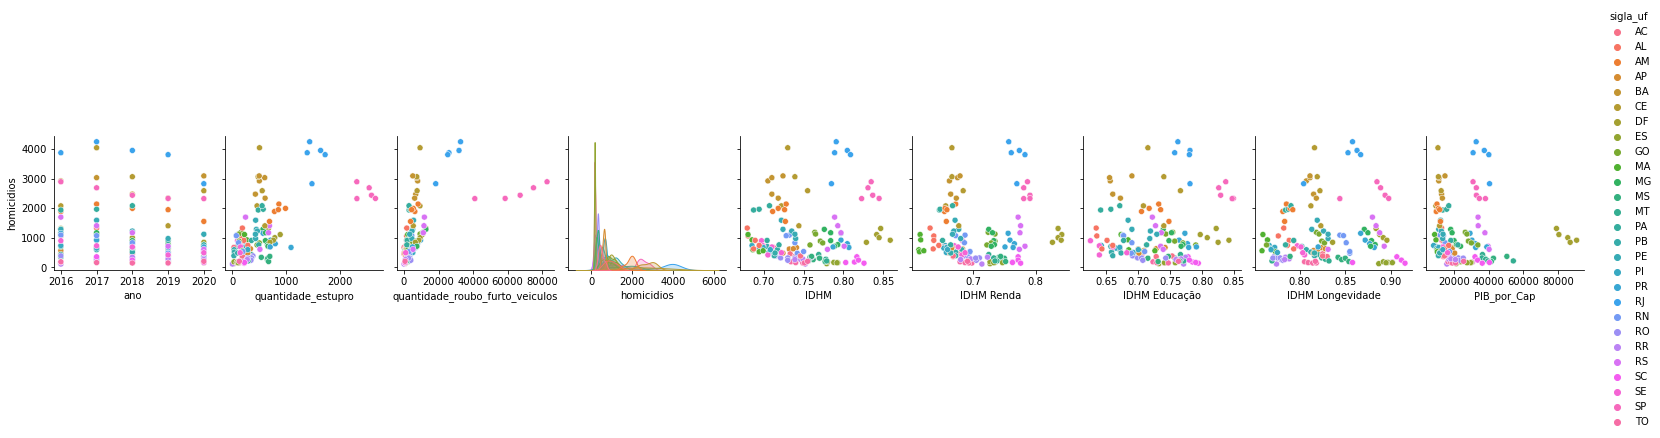

In [89]:
import seaborn as sns
sns.pairplot(dados_combinados, hue='sigla_uf', y_vars=["homicidios"])

Diante dos resultados acima, em que não a muita relação entre os dados, surge-se a necessidade de melhorar a proporção entre o homício de cada estado e sua real população. Para isso, iremos importar mais uma base de dados.

In [90]:
dados_Populacao =  pd.read_excel('dados_Populacao.xlsx')
dados_Populacao

,ano,sigla_uf,População total
0,2016,AC,828436
1,2016,AL,3286849
2,2016,AP,788892
3,2016,AM,3798072
4,2016,BA,14670485
...,...,...,...
130,2020,RR,562620
131,2020,SC,7240674
132,2020,SP,46282864
133,2020,SE,2318678


Agora basta relacionar os dados

In [91]:
dados_combinados['homicidios_cada_100000'] = (dados_ate_2020['homicidios']/dados_Populacao['População total'])*100000


In [92]:
dados_combinados

,ano,sigla_uf,quantidade_estupro,quantidade_roubo_furto_veiculos,homicidios,IDHM,IDHM Renda,IDHM Educação,IDHM Longevidade,PIB_por_Cap,homicidios_cada_100000
0,2016,AC,111.0,0.0,487.0,0.723,0.660,0.704,0.815,13696.683182,58.785470
1,2016,AL,155.0,1538.0,1060.0,0.680,0.637,0.635,0.776,11188.969216,32.249732
2,2016,AM,783.0,6279.0,1887.0,0.711,0.654,0.705,0.781,9664.777581,239.196240
3,2016,AP,306.0,997.0,567.0,0.733,0.682,0.709,0.815,16830.723750,14.928627
4,2016,BA,501.0,7863.0,2920.0,0.705,0.662,0.656,0.807,11139.893501,19.903909
...,...,...,...,...,...,...,...,...,...,...,...
130,2020,RS,512.0,5217.0,607.0,0.780,0.774,0.739,0.831,40208.401670,107.888095
131,2020,SC,225.0,510.0,163.0,0.803,0.763,0.790,0.858,40401.037559,2.251172
132,2020,SE,144.0,929.0,492.0,0.722,0.687,0.682,0.803,16220.550933,1.063028
133,2020,SP,2318.0,41000.0,2322.0,0.823,0.781,0.847,0.844,38075.776667,100.143271


com a nova relação de homicidios por milhão de habitantes iremos novamente procurar uma relação entre os dados

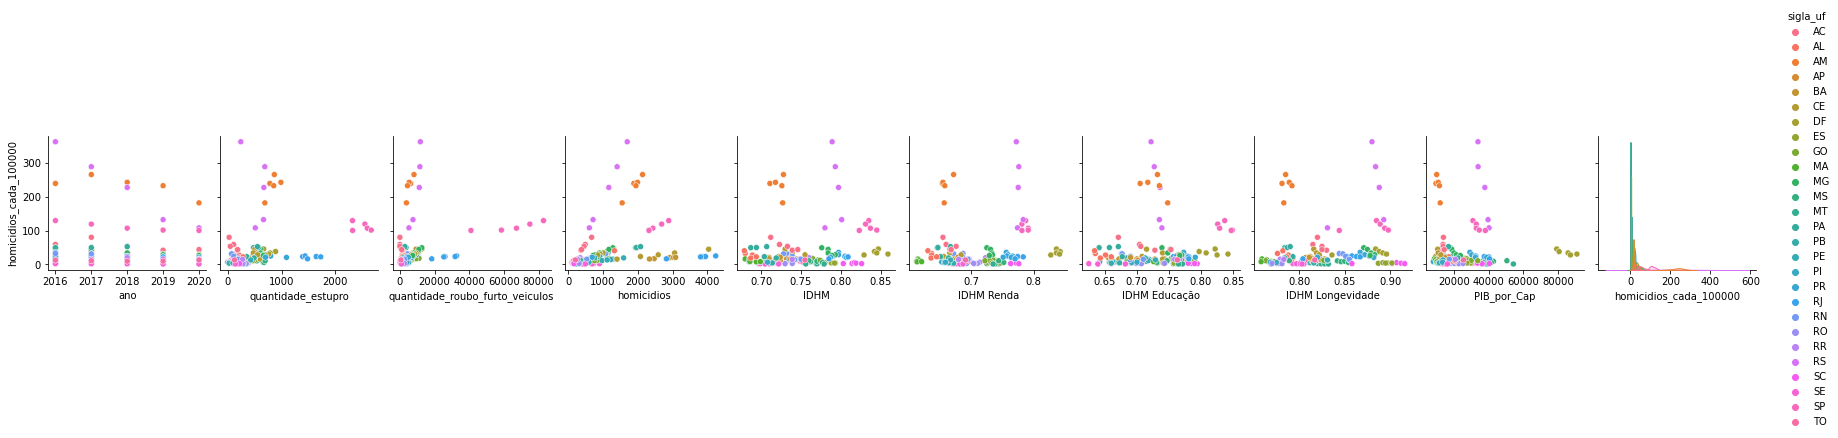

In [93]:
sns.pairplot(dados_combinados, hue='sigla_uf', y_vars=["homicidios_cada_100000"])

C:\Users\mathe\AppData\Local\Temp/ipykernel_21232/410674701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados_combinados.corr(), annot=True, vmin=-1, vmax=1)


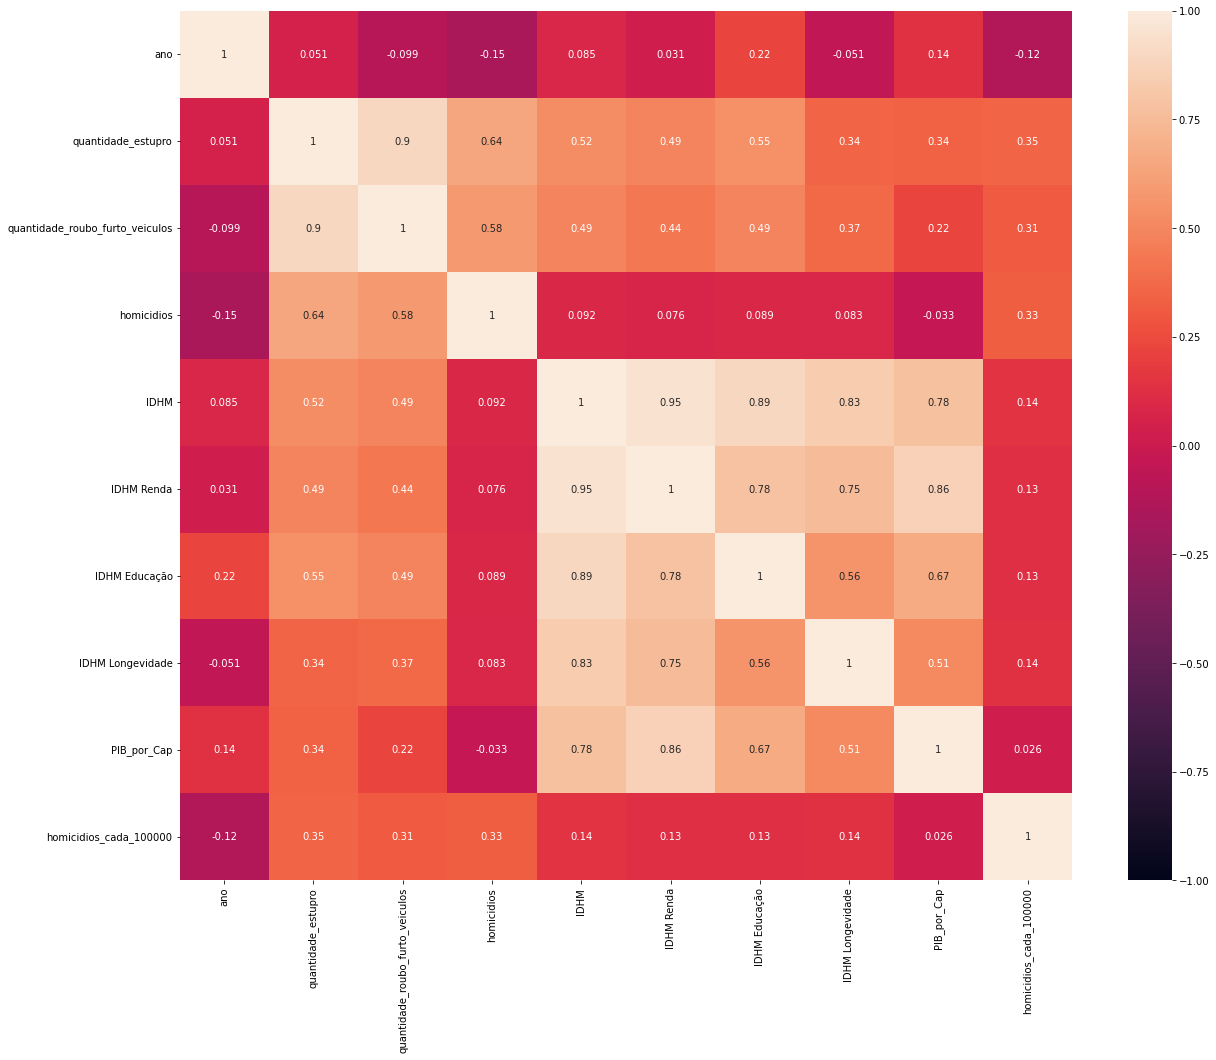

In [94]:
plt.figure(figsize = (20,16))
sns.heatmap(dados_combinados.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

 A seguir vimos a relção de algumas variaveis juntamente com o numero de homicidios a cada 100000 habitantes para saber a influência delas nessa taxa 

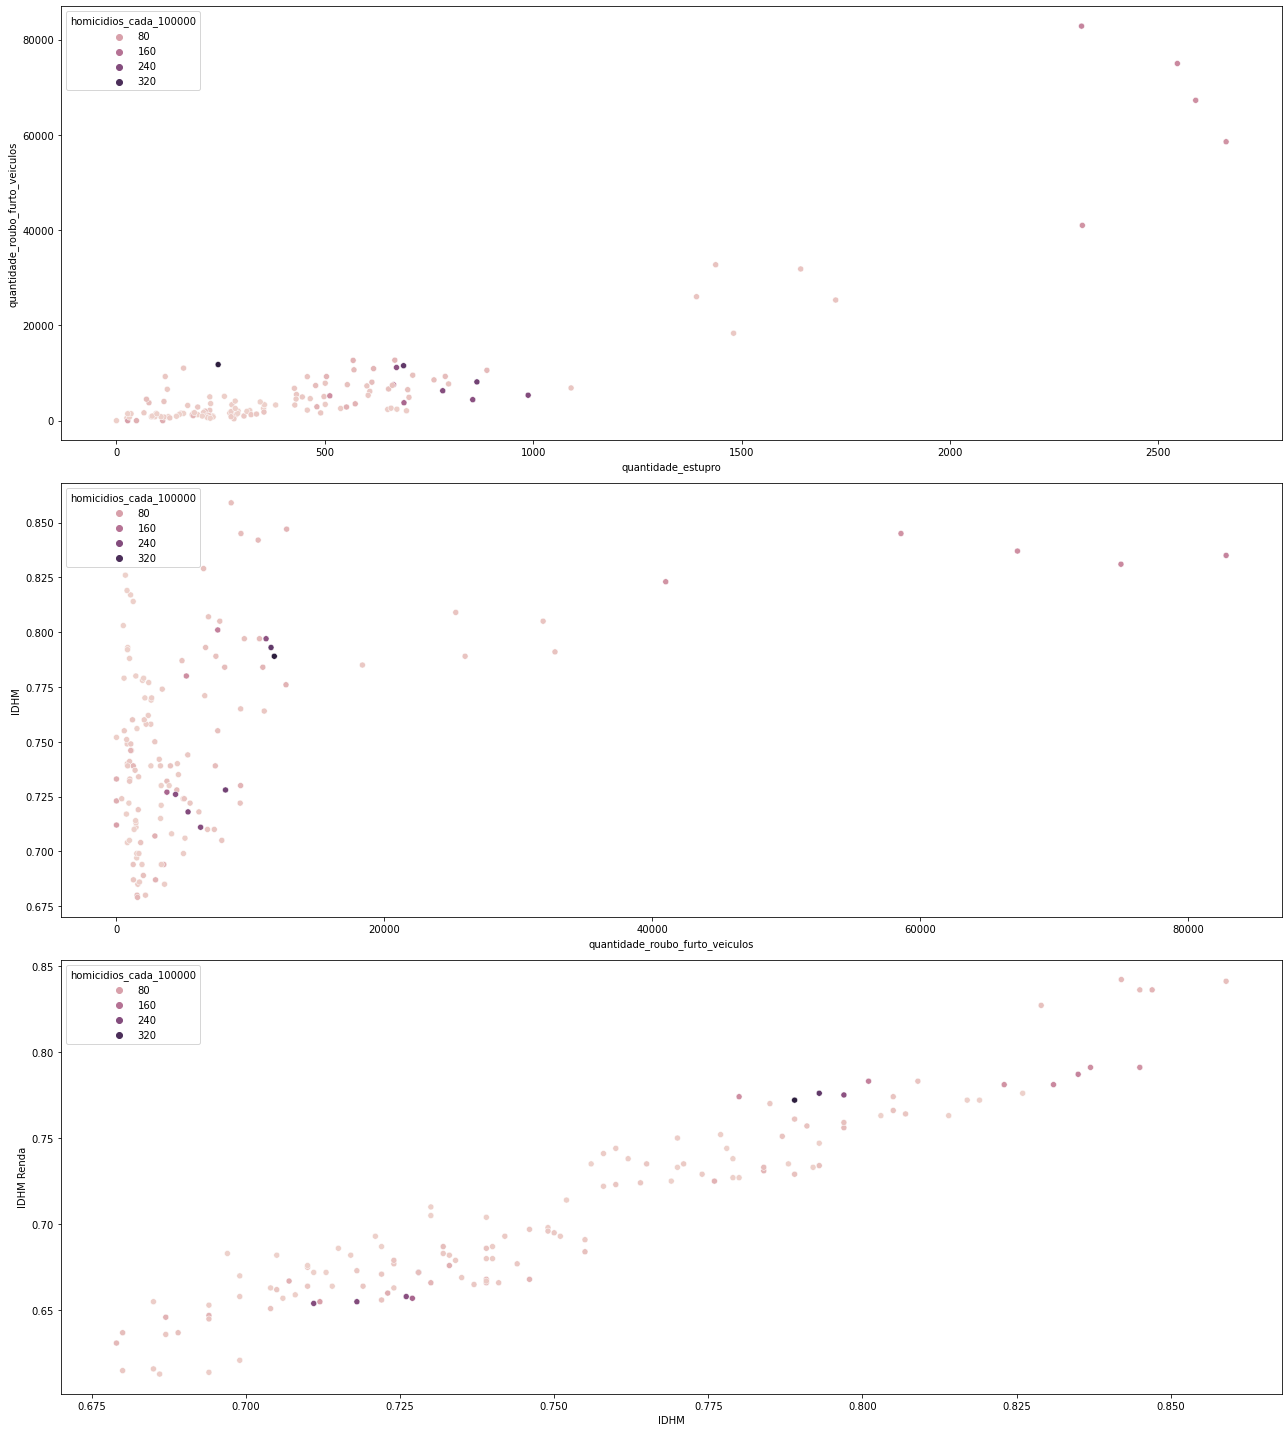

In [95]:
plt.figure(figsize = (18, 20))

plt.subplot(311)
sns.scatterplot(data=dados_combinados, x='quantidade_estupro', y='quantidade_roubo_furto_veiculos', hue='homicidios_cada_100000')

plt.subplot(312)
sns.scatterplot(data=dados_combinados, x='quantidade_roubo_furto_veiculos', y='IDHM', hue='homicidios_cada_100000')

plt.subplot(313)
sns.scatterplot(data=dados_combinados, x='IDHM', y='IDHM Renda', hue='homicidios_cada_100000')

plt.tight_layout()
plt.show()

Foi possível apenas achar uma relação positiva entre o IDHM Renda e o IDHM, porém a relação entre o IDHM e a quantidade de roubo/furto de veiculos é quase inexistente, e a relação dos furtos com a quantidade de estupros por mais que exista é muito fraca

In [96]:
# Obtendo as colunas que são float ou int
colunas_numericas = []
for coluna in dados_combinados.columns:
    if dados_combinados[coluna].dtype in ['float64', 'int64']:  # Verifica se o tipo é float ou int
        colunas_numericas.append(coluna)

# Criando um novo DataFrame com as colunas numéricas
dados_numericos = dados_combinados[colunas_numericas].copy()
dados_numericos

,ano,quantidade_estupro,quantidade_roubo_furto_veiculos,homicidios,IDHM,IDHM Renda,IDHM Educação,IDHM Longevidade,PIB_por_Cap,homicidios_cada_100000
0,2016,111.0,0.0,487.0,0.723,0.660,0.704,0.815,13696.683182,58.785470
1,2016,155.0,1538.0,1060.0,0.680,0.637,0.635,0.776,11188.969216,32.249732
2,2016,783.0,6279.0,1887.0,0.711,0.654,0.705,0.781,9664.777581,239.196240
3,2016,306.0,997.0,567.0,0.733,0.682,0.709,0.815,16830.723750,14.928627
4,2016,501.0,7863.0,2920.0,0.705,0.662,0.656,0.807,11139.893501,19.903909
...,...,...,...,...,...,...,...,...,...,...
130,2020,512.0,5217.0,607.0,0.780,0.774,0.739,0.831,40208.401670,107.888095
131,2020,225.0,510.0,163.0,0.803,0.763,0.790,0.858,40401.037559,2.251172
132,2020,144.0,929.0,492.0,0.722,0.687,0.682,0.803,16220.550933,1.063028
133,2020,2318.0,41000.0,2322.0,0.823,0.781,0.847,0.844,38075.776667,100.143271


In [97]:
del dados_numericos['ano']

Para podemos usar o classificador KNeighborsClassifier do Scikit-learn devemos transformar nossa coluna "homicidios_cada_100000" em rótulos categóricos

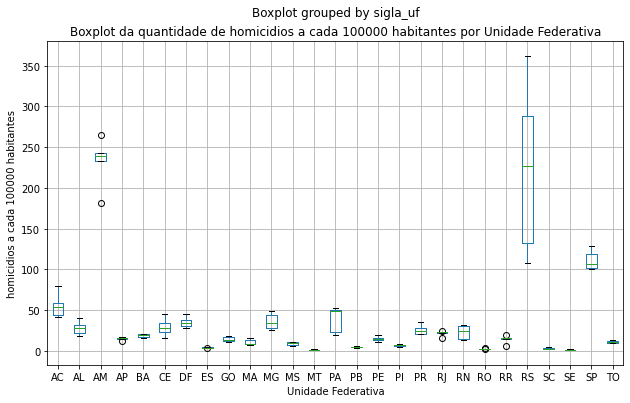

In [98]:
# Criar uma figura com um subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot da quantidade de homicidios a cada 100000 habitantes por UF
dados_combinados.boxplot('homicidios_cada_100000', 'sigla_uf', ax=ax)
ax.set_title('Boxplot da quantidade de homicidios a cada 100000 habitantes por Unidade Federativa')
ax.set_xlabel('Unidade Federativa')
ax.set_ylabel('homicidios a cada 100000 habitantes')

# Exibir o terceiro gráfico
plt.show()


Com base no Boxplot consideraremos que numeros acima de 100 são altos, entre 25 e 100 são médios e abaixo de 25 são baixos

In [99]:
# Definindo os intervalos para categorização
intervalos = [-float('inf'), 25, 100, float('inf')]  
rotulos = [1, 2, 3]  # Números correspondentes aos intervalos

# Criando a coluna categórica com os números correspondentes aos intervalos
dados_numericos['categoria_homicidios'] = pd.cut(dados_numericos['homicidios_cada_100000'], bins=intervalos, labels=rotulos)

# Escala: 
# 1 - Taxa Baixa 
# 2 - Taxa Média 
# 3 - Taxa Alta

dados_numericos

,quantidade_estupro,quantidade_roubo_furto_veiculos,homicidios,IDHM,IDHM Renda,IDHM Educação,IDHM Longevidade,PIB_por_Cap,homicidios_cada_100000,categoria_homicidios
0,111.0,0.0,487.0,0.723,0.660,0.704,0.815,13696.683182,58.785470,2
1,155.0,1538.0,1060.0,0.680,0.637,0.635,0.776,11188.969216,32.249732,2
2,783.0,6279.0,1887.0,0.711,0.654,0.705,0.781,9664.777581,239.196240,3
3,306.0,997.0,567.0,0.733,0.682,0.709,0.815,16830.723750,14.928627,1
4,501.0,7863.0,2920.0,0.705,0.662,0.656,0.807,11139.893501,19.903909,1
...,...,...,...,...,...,...,...,...,...,...
130,512.0,5217.0,607.0,0.780,0.774,0.739,0.831,40208.401670,107.888095,3
131,225.0,510.0,163.0,0.803,0.763,0.790,0.858,40401.037559,2.251172,1
132,144.0,929.0,492.0,0.722,0.687,0.682,0.803,16220.550933,1.063028,1
133,2318.0,41000.0,2322.0,0.823,0.781,0.847,0.844,38075.776667,100.143271,3


In [100]:
del dados_numericos ['homicidios_cada_100000']

In [101]:
# Colunas dos "features"
X = np.array(dados_numericos.drop(['categoria_homicidios'], 1))

# Colunas do "target"
y = np.array(dados_numericos['categoria_homicidios'])

C:\Users\mathe\AppData\Local\Temp/ipykernel_21232/1217509680.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dados_numericos.drop(['categoria_homicidios'], 1))


In [102]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=0)

In [103]:
clf = neighbors.KNeighborsClassifier(n_neighbors=2, metric='euclidean')

In [104]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [105]:
accuracy = clf.score(X_test, y_test)
accuracy

0.8048780487804879

In [106]:
from sklearn.metrics import confusion_matrix

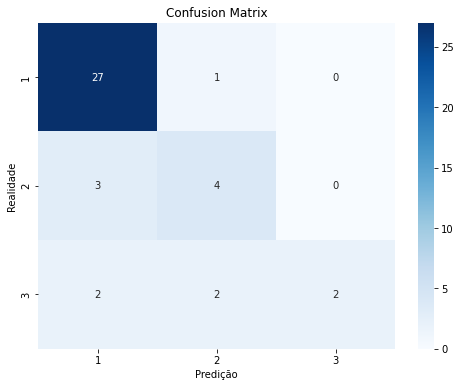

In [107]:
# Fazendo previsões nos dados de teste
y_pred = clf.predict(X_test)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predição')
plt.ylabel('Realidade')
plt.title('Confusion Matrix')
plt.show()

## Conclusões